# 5. 영화리뷰 텍스트 감성분석하기

## 5-1. 들어가며

매일 새로운 주제를 공부해 나가시는 건 어떠신가요? 어떤 분에게는 벅찰 수도 있고, 어떤 분에게는 즐거움의 연속일 수 있습니다. 그렇지만 이렇게 짧은 시간 동안 다양한 도메인에 대해 학습을 하는 경험은 쉽지 않으니 조금만 더 힘을 내서 따라와 주시면 좋겠습니다.

오늘은 자연어 처리에 주로 활용되는 RNN(Recurrent Neural Network)에 대해 배워볼 예정입니다. 그리고 컴퓨터 비전에서만 사용되는 줄 알았던 CNN(Convolutional Neural Network)이 자연어 처리에서 사용될 수도 있다는 것을 알게 되실 것입니다.
또한, 이 모델들의 구조를 학습하고 이를 활용하여 우리가 네이버나 다음 영화에서 확인할 수 있는 영화리뷰에 대한 감성분석(sentiment analysis) 를 진행해 보도록 하겠습니다.

그럼 지금부터 시작해 보겠습니다.

### 학습 목표
---
- 텍스트 데이터를 머신러닝 입출력용 수치데이터로 변환하는 과정을 이해합니다.
- RNN의 특징을 이해하고 시퀀셜한 데이터를 다루는 방법을 이해합니다.
- 1-D CNN으로도 텍스트를 처리할 수 있음을 이해합니다.
- IMDB와 네이버 영화리뷰 데이터셋을 이용한 영화리뷰 감성 분류 실습을 진행합니다.

### 학습 내용
---
1. 텍스트 감정분석의 유용성
    - 텍스트 데이터를 통해 얻을 수 있는 정보와 활용에 대해 살펴봅니다.
2. 텍스트 데이터의 특징
3. 텍스트 데이터의 특징 (1) 텍스트를 숫자로 표현하는 방법
4. 텍스트 데이터의 특징 (2) Embedding 레이어의 등장
5. 시퀀스 데이터를 다루는 RNN
    - 시퀀스 데이터와 RNN의 구조에 대해 알아봅니다.
6. 꼭 RNN이어야 할까?
    - 실습과 함께 RNN의 효율성에 대해 살펴봅니다.
7. IMDB 영화리뷰 감성분석 (1) IMDB 데이터셋 분석
8. IMDB 영화리뷰 감성분석 (2) 딥러닝 모델 설계와 훈련
9. IMDB 영화리뷰 감성분석 (3) Word2Vec의 적용

## 5-2. 텍스트 감정분석의 유용성

오늘 우리는 딥러닝을 통해 텍스트에 담긴 감성을 분석(Sentimental Analysis)하는 방법을 배워 볼 것입니다. 구체적으로는 IMDB나 네이버 영화 리뷰 텍스트에 담긴 이용자의 감성이 긍정적인지 혹은 부정적인지를 분류(Classification) 할 수 있는 딥러닝 모델을 만들어 볼 것입니다.

그런데 딥러닝을 이용한 텍스트 감성분석은 어떤 점에서 유용할까요? 이 막연한 질문을 좀 더 세부적인 질문으로 잘게 쪼개면 다음과 같은 질문들로 나눠볼 수 있을 것입니다.

- 텍스트 데이터만이 가지고 있는 정보적 특성과 가치는 어떤 것일까요?
- 감성분석 등 텍스트 분류 모델이 다른 데이터 분석 업무에 어떤 점에서 도움을 주나요?
- 텍스트 데이터 분석의 기술적 어려움은 무엇인가요?
- 텍스트 분류 작업을 하는데 딥러닝이 적용되면 어떤 점에서 유리해질까요?

이 질문들에 답을 제공하는 유용한 아티클 하나를 소개하겠습니다. 이 아티클을 정독하시면서 위 질문들에 대한 답을 찾아서 스스로 정리해 보시기 바랍니다. 하지만 정답이 있는 것은 아닙니다.
이 아티클을 통해 산업 현장에서 텍스트 분류가 실제로 활용되는 구체적인 사례도 확인할 수 있습니다.

동아비즈니스리뷰 감성분석 활용 사례 기고 (https://dbr.donga.com/article/view/1202/article_no/8891/ac/magazine)

## 5-3. 텍스트 데이터의 특징

인공지능 모델을 입력과 출력이 정해진 함수라고 생각해 봅시다. 예를 들어 MNIST 숫자 분류기 모델이라면 이미지 파일을 읽어 들인 매트릭스가 입력이 되고, 이미지 파일에 쓰여 있는 실제 숫자 값이 출력이 되는 함수가 될 것입니다.
이제 텍스트 문장을 입력으로 받아서 그 의미가 긍정이면 1, 부정이면 0을 출력하는 인공지능 모델을 만든다고 생각해 봅시다. 이 모델을 만들기 위해서는 숫자 분류기를 만들 때는 생각할 필요가 없었던 2가지 문제가 생깁니다.

- 텍스트를 어떻게 숫자 행렬로 표현할 수 있나요?
- 텍스트에는 순서가 중요합니다. 입력 데이터의 순서를 인공지능 모델에 어떻게 반영해야 하나요?

위 두 문제를 해결하기 위해, 일반적으로 Encoding 과 Embedding이라는 두 가지 기법을 사용합니다.
각각의 방식을 어떻게 수행하며, 어떤 차이를 가지는지 살펴보겠습니다.

### 5-4. 텍스트 데이터의 특징 (1) 텍스트를 숫자로 표현하는 방법

인공지능 모델의 입력이 될 수 있는 것은 0과 1의 비트로 표현 가능한 숫자만으로 이루어진 매트릭스일 뿐입니다.
아주 단순히, A=0, B=1, ..., Z=25 라고 숫자를 임의로 부여한다고 해봅시다.
그러면 의미적으로 A와 B는 1만큼 멀고, A와 Z는 25만큼 멀까요? 그렇지 않습니다. 텍스트의 중요한 특징은 그 자체로는 기호일 뿐이며, 텍스트가 내포하는 의미를 기호가 직접 내포하지 않는다는 점입니다.

하지만 우리는 우선 단어 사전을 만들어 볼 수는 있습니다. 우리가 사용하는 국어, 영어 사전에는 단어와 그 의미 설명이 짝지어져 있습니다.
우리가 하려는 것은 단어와 그 단어의 의미를 나타내는 벡터를 짝지어 보려고 하는 것입니다. 그런데 그 벡터는 어디서 가져올까요? 그렇습니다. 우리는 딥러닝을 통해 그 벡터를 만들어 낼 수 있습니다.

아래와 같이 단 3개의 짧은 문장으로 이루어진 텍스트 데이터를 처리하는 간단한 예제를 생각해 보겠습니다.

> i feel hungry  
i eat lunch  
now i feel happy

In [1]:
# 처리해야 할 문장을 파이썬 리스트에 옮겨 담았습니다.
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

# 파이썬 split() 메소드를 이용해 단어 단위로 문장을 쪼개 봅니다.
word_list = 'i feel hungry'.split()
print(word_list)

['i', 'feel', 'hungry']


우리의 텍스트 데이터로부터 사전을 만들기 위해 모든 문장을 단어 단위로 쪼갠 후에 파이썬 딕셔너리(dict) 자료구조로 표현해 보겠습니다.

In [2]:
index_to_word={}  # 빈 딕셔너리를 만들어서

# 단어들을 하나씩 채워 봅니다. 채우는 순서는 일단 임의로 하였습니다. 그러나 사실 순서는 중요하지 않습니다. 
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어줍니다. 
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


단어 10개짜리 작은 딕셔너리가 만들어졌습니다. 하지만 우리가 가진 텍스트 데이터를 숫자로 바꿔 보려고 하는데, 텍스트를 숫자로 바꾸려면 위의 딕셔너리가 {텍스트:인덱스} 구조여야 합니다.

In [3]:
word_to_index={word:index for index, word in index_to_word.items()}
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


In [4]:
print(word_to_index['feel'])  # 단어 'feel'은 숫자 인덱스 4로 바뀝니다.

4


In [5]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수를 만들어 봅시다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

print(get_encoded_sentence('i eat lunch', word_to_index))

[1, 3, 6, 7]


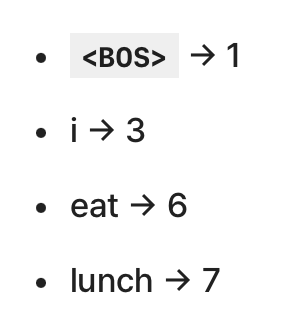

이렇게 텍스트 혹은 범주형 데이터를 정수에 대응하는 방법을 ‘정수 인코딩’ 이라고 합니다. 인코딩은 이 외에도 원-핫 인코딩, 멀티-핫 인코딩 등이 있습니다.

In [6]:
# 여러 개의 문장 리스트를 한꺼번에 숫자 텐서로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# sentences=['i feel hungry', 'i eat lunch', 'now i feel happy'] 가 아래와 같이 변환됩니다. 
encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


In [7]:
# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

print(get_decoded_sentence([1, 3, 4, 5], index_to_word))

i feel hungry


In [8]:
# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

# encoded_sentences=[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 가 아래와 같이 변환됩니다.
print(get_decoded_sentences(encoded_sentences, index_to_word))

['i feel hungry', 'i eat lunch', 'now i feel happy']


## 5-5. 텍스트 데이터의 특징 (2) Embedding 레이어의 등장

텍스트가 숫자로 변환되어 인공지능 모델의 입력으로 사용될 수 있게 되었지만, 이것으로 충분하지는 않습니다. 'i feel hungry'가 1, 3, 4, 5 로 변환되었지만 이 벡터는 텍스트에 담긴 언어의 의미와 대응되는 벡터가 아니라 임의로 부여된 단어의 순서에 불과합니다. 우리가 하려는 것은 단어와 그 단어의 의미를 나타내는 벡터를 짝짓는 것이었습니다. 그래서 단어의 의미를 나타내는 벡터를 훈련 가능한 파라미터로 놓고 이를 딥러닝을 통해 학습해서 최적화하게 됩니다. Tensorflow, Pytorch 등의 딥러닝 프레임워크들은 이러한 의미 벡터 파라미터를 구현한 Embedding 레이어를 제공합니다.

> 임베딩(Embedding)이란?  
자연어 처리(Natural Language Processing)분야에서 임베딩(Embedding)은 사람이 쓰는 자연어를 기계가 이해할 수 있는 숫자형태인 vector로 바꾼 결과 혹은 그 일련의 과정 전체를 의미한다. 가장 간단한 형태의 임베딩은 단어의 빈도를 그대로 벡터로 사용하는 것이다.
임베딩을 통해 할수있는 것은 단어나 문장 사이의 코사인 유사도가 가장 높은 단어를 구하는 등의 계산, 단어들 사이의 의미/문법적 정보 도출 벡터 간 연산으로 단어 사이 문법적 관계 도출, 전이 학습(transfer learning)
임베딩은 다른 딥러닝 모델의 입력값으로 자주 쓰이고, 품질 좋은 임베딩을 쓸수록 모델의 성능이 좋아집니다.

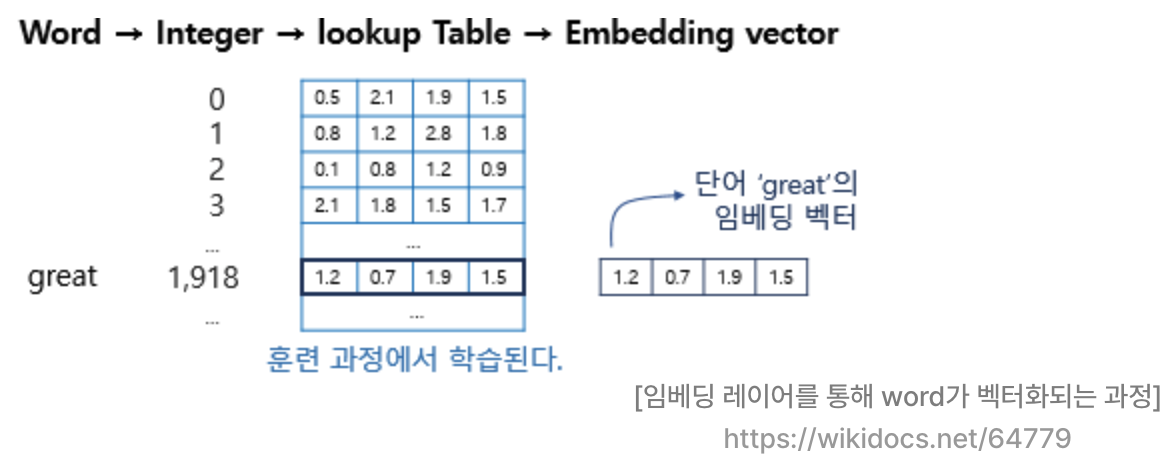

위 그림에서 word_to_index('great')는 1918입니다. 그러면 'great'라는 단어의 의미 공간상의 워드 벡터(word vector)는 Lookup Table 형태로 구성된 Embedding 레이어의 1919번째 벡터가 됩니다. 위 그림에서는 1.2, 0.7, 1.9, 1.5가 됩니다.
 Embedding 레이어를 활용하여 이전 스텝의 텍스트 데이터를 워드 벡터 텐서 형태로 다시 표현해 보겠습니다.

In [12]:
# 아래 코드는 그대로 실행하시면 에러가 발생할 것입니다. 

import numpy as np
import tensorflow as tf
import os

vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 위 그림과 같이 4차원의 워드 벡터를 가정합니다. 

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# 숫자로 변환된 텍스트 데이터 [[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 에 Embedding 레이어를 적용합니다. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype='object')
output = embedding(raw_inputs)
print(output)

ValueError: setting an array element with a sequence.

실행해 보니 에러가 발생합니다. 왜 그럴까요?

주의해야 할 점이 있습니다. Embedding 레이어의 인풋이 되는 문장 벡터는 그 길이가 일정해야 합니다. raw_inputs의 3개 벡터의 길이는 각각 4, 4, 5입니다.
Tensorflow에서는 tf.keras.preprocessing.sequence.pad_sequences라는 편리한 함수를 통해 문장 벡터 뒤에 패딩(<PAD>)을 추가하여 길이를 일정하게 맞춰주는 기능을 제공합니다.

In [13]:
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
print(raw_inputs)

[[1 3 4 5 0]
 [1 3 6 7 0]
 [1 8 3 4 9]]


짧은 문장 뒤쪽이 0으로 채워지는 것을 확인할 수 있습니다. <PAD> 가 0에 매핑되어 있다는 걸 기억하세요.

그러면 위에 시도했던 output = embedding(raw_inputs)을 다시 시도해 봅시다.

In [14]:
vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 그림과 같이 4차원의 워드 벡터를 가정합니다.

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# tf.keras.preprocessing.sequence.pad_sequences를 통해 word vector를 모두 일정 길이로 맞춰주어야 
# embedding 레이어의 input이 될 수 있음에 주의해 주세요. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype=object)
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
output = embedding(raw_inputs)
print(output)

tf.Tensor(
[[[ 0.03567468 -0.02190598 -0.03785193  0.00398916]
  [-0.00349921 -0.01326282 -0.01724265  0.03596422]
  [-0.00091658  0.03081265 -0.03328949  0.03832588]
  [-0.00251343  0.00776001 -0.01712073  0.02438769]
  [-0.03664175  0.01198594 -0.01698389 -0.04453072]]

 [[ 0.03567468 -0.02190598 -0.03785193  0.00398916]
  [-0.00349921 -0.01326282 -0.01724265  0.03596422]
  [ 0.04826101 -0.03420637 -0.04965102  0.01973922]
  [ 0.02343572  0.00947661  0.03774187  0.0248981 ]
  [-0.03664175  0.01198594 -0.01698389 -0.04453072]]

 [[ 0.03567468 -0.02190598 -0.03785193  0.00398916]
  [-0.018085   -0.02304014 -0.01426346 -0.02659539]
  [-0.00349921 -0.01326282 -0.01724265  0.03596422]
  [-0.00091658  0.03081265 -0.03328949  0.03832588]
  [-0.04372552 -0.0347022   0.04252386 -0.02977748]]], shape=(3, 5, 4), dtype=float32)
